 
#  Titanic Dataset Analysis

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline



### Data Acquisition of the Titanic dataset


In [6]:
Train_df = pd.read_csv("C:\Users\RB185092\Desktop\Sowmya DS Course\Python\\train.csv")
Test_df =  pd.read_csv("C:\Users\RB185092\Desktop\Sowmya DS Course\Python\\test.csv")
Test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


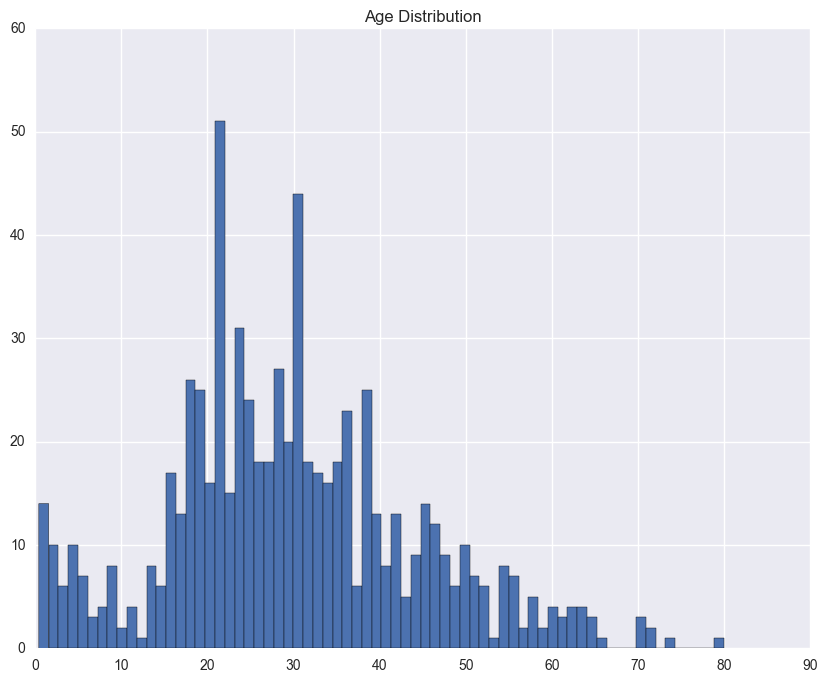

In [8]:
plt.figure(figsize=(10,8))
Train_df['Age'].hist(bins=70)
plt.title('Age Distribution')

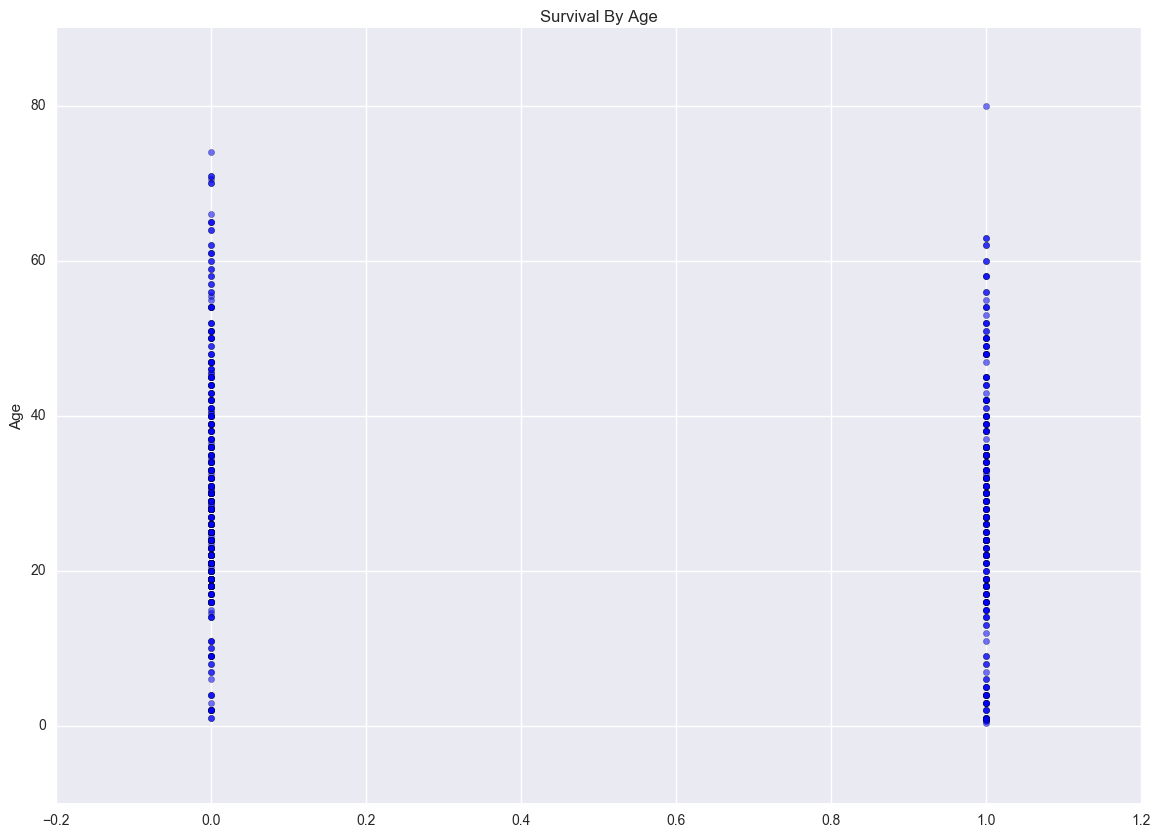

In [9]:
plt.figure(figsize=(14,10))
plt.scatter(Train_df.Survived,Train_df.Age,alpha=0.55)
plt.ylabel('Age')
plt.grid(which='major',axis='y',b=True)
plt.title('Survival By Age')

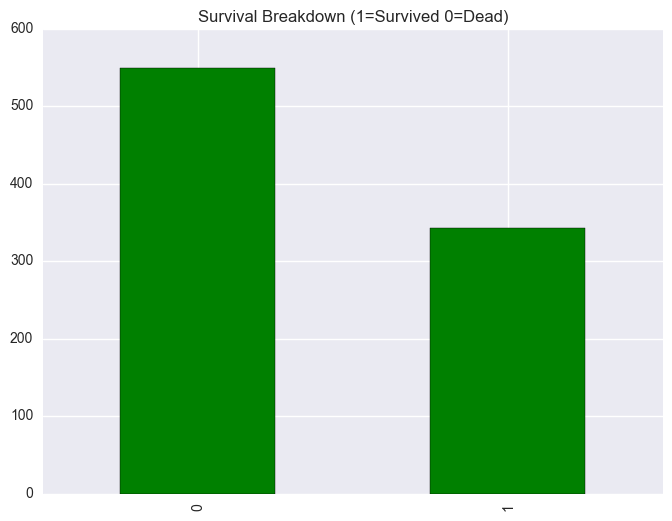

In [10]:
plt.figure(figsize=(8,6))
Train_df.Survived.value_counts().plot(kind='bar',color='green')
plt.title('Survival Breakdown (1=Survived 0=Dead)')
plt.show()

### Perform Exploratory Data Analysis (EDA) for the train dataset

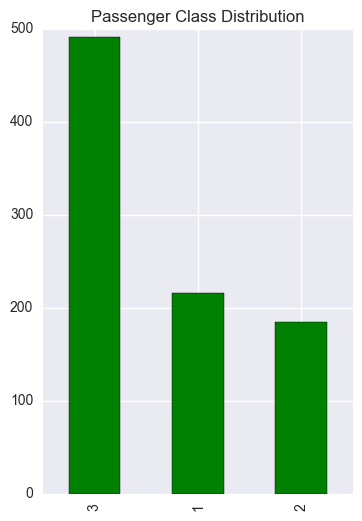

In [13]:
plt.figure(figsize=(4,6))
Train_df.Pclass.value_counts().plot(kind='bar',color='green')
plt.title('Passenger Class Distribution')
plt.show()

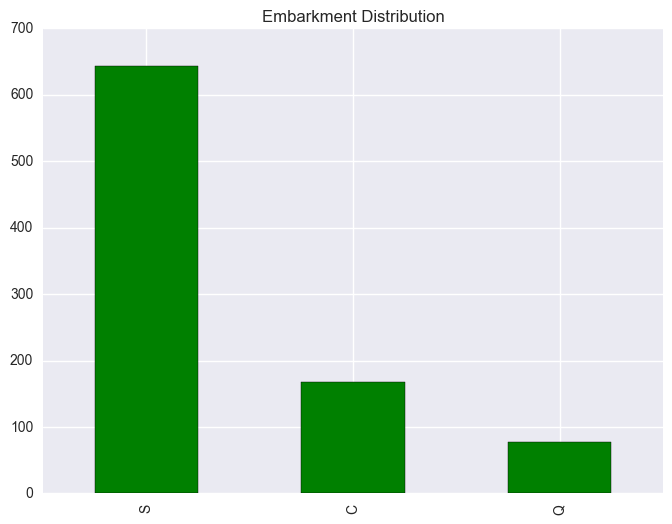

In [14]:
plt.figure(figsize=(8,6))
Train_df.Embarked.value_counts().plot(kind='bar',color='green')
plt.title('Embarkment Distribution')
plt.show()

In [16]:
def load_titanic_train_data():
    Titanic_Train_df = pd.read_csv("C:\Users\RB185092\Desktop\Sowmya DS Course\Python\\train.csv")
    Cols=["Pclass","Sex","Age"]
    Titanic_Train_df["Sex"] = Titanic_Train_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    Titanic_Train_df["Age"] = Titanic_Train_df["Age"].fillna(Titanic_Train_df["Age"].mean())
    Titanic_Train_df["Fare"] = Titanic_Train_df["Fare"].fillna(Titanic_Train_df["Fare"].mean())
    return  Titanic_Train_df["Survived"].values, Titanic_Train_df[Cols].values

In [17]:
def load_titanic_test_data():
    Titanic_Test_df = pd.read_csv("C:\Users\RB185092\Desktop\Sowmya DS Course\Python\\test.csv")
    Cols=["Pclass","Sex","Age"]
    Titanic_Test_df["Sex"] = Titanic_Test_df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
    Titanic_Test_df["Age"] = Titanic_Test_df["Age"].fillna(Titanic_Test_df["Age"].mean())
    Titanic_Test_df["Fare"] = Titanic_Test_df["Fare"].fillna(Titanic_Test_df["Fare"].mean())
    return   Titanic_Test_df[Cols].values

In [18]:
Survived,Training_Data = load_titanic_train_data()
Test_Data = load_titanic_test_data()

### Perform machine learning to train the machine model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression()

In [22]:
model.fit(Training_Data,Survived)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Machine Learning: Model Training

In [25]:
Predicted_Values = model.predict(Test_Data)

In [26]:
Predicted_Values

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,